In [1]:
%pylab inline
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# load the Insular data...
insData = sc.read('./data_h5/Insular_sorted_clusters.h5ad')

In [3]:
# load the Insular counts data...
ins_counts = sc.read('./data_h5/AllCells_raw.h5ad')

In [4]:
insData

AnnData object with n_obs × n_vars = 122663 × 19944
    obs: 'batch', 'doublet_score', 'predicted_doublets', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sex', 'Sample', 'cellTypeID', 'cellTypeLabel', 'cell_subtypeID', 'cell_subtypeLabels', 'cellTypeID_2', 'cellType_labels_2', 'sampleLayers'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Sample_colors', 'Sex_colors', 'batch_colors', 'cellTypeID_2_colors', 'cellTypeID_colors', 'cellTypeLabel_colors', 'cellType_labels_2_colors', 'cell_subtypeID_colors', 'cell_subtypeLabels_colors', 'dendrogram_cellTypeLabel', 'dendrogram_cellType_labels_2', 'dendrogram_cell_subtypeLabels', 'hvg', 'neighbors', 'pca', 'rank_genes_groups', 'sampleLayers_colors', 'tsne', 'umap'
    obsm: 'X_harmonypca', 'X_pca', 'X_tsne', 'X_umap', 'X_umapharmony', '

In [5]:
insData = insData[insData.obs['cellTypeID_2'].isin([54,55,56,57,58,59]),]

In [6]:
ins_adata=sc.AnnData(ins_counts[insData.obs_names,insData.var_names].X,dict(obs_names=insData.obs_names),dict(var_names=insData.var_names))
ins_adata.obs['batch'] = insData.obs['batch'].astype('str')
ins_adata.obs['area'] = 'Ins'
ins_adata.obs['cellTypeID'] = insData.obs['cellTypeID']
ins_adata.obs['cellType_labels'] = insData.obs['cell_subtypeLabels']
ins_adata.obs['Sex'] = insData.obs['Sex']
ins_adata.obs['Sample'] = insData.obs['Sample']
ins_adata.obs['cellTypeID_2'] = insData.obs['cellTypeID_2']
ins_adata.obs['cellType_labels_2'] = insData.obs['cellType_labels_2']

In [7]:
# load the V1 data...
v1Data = sc.read('../10X/data_h5/FM27_cell_133454_wk_1.h5')

In [8]:
v1Data

AnnData object with n_obs × n_vars = 73597 × 18297
    obs: 'Layer', 'MonkeyID', 'age', 'batch', 'cell_label', 'cell_label_old', 'class', 'louvain', 'marker1', 'marker2', 'n_counts', 'n_genes', 'name', 'percent_mito', 'subclass', 'cell_label_reorder', 'class_new', 'predict_type', 'class_show', 'cell_label1', 'cell_label_20210903', 'sex', 'subclass_1', 'cell_label_dendro', 'subclass_2'
    var: 'ENS', 'x', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Layer_colors', 'MonkeyID_colors', 'age_colors', 'cell_label1_colors', 'cell_label_colors', 'cell_label_colors_old', 'cell_label_colors_purpleNXPH4', 'cell_label_dendro_colors', 'cell_label_old_colors', 'cell_label_reorder_colors', 'class_colors', 'class_show_colors', 'dendrogram_cell_label_dendro', 'marker1_colors', 'marker2_colors', 'sex_colors', 'subclass_1_colors', 'subclass_2_colors', 'sublcass_1_colors'
    obsm: 'X_harmonypca', 'X_neuron_tsne', 'X_pca', 'X_tsne', 'X_tsne_old', 'X_um

In [9]:
v1Data = v1Data[v1Data.obs['class_new'].isin(['OPC','Astrocyte','Oligo','Pericyte','Microglia']),]

In [10]:
v1_adata = sc.AnnData(v1Data.X,dict(obs_names=v1Data.obs_names),dict(var_names=v1Data.var_names))
v1_adata.obs['batch'] = v1Data.obs['batch']
v1_adata.obs['area'] = 'V1'
v1_adata.obs['sex'] = v1Data.obs['sex']
v1_adata.obs['class_new'] = v1Data.obs['class_new']
v1_adata.obs['cell_label_reorder'] = v1Data.obs['cell_label_reorder']

In [11]:
del(insData, ins_counts, v1Data)

In [12]:
adata = ins_adata.concatenate(v1_adata,index_unique = None)

In [13]:
adata.obs['species']=adata.obs['area']
batch_t=list(ins_adata.obs['batch'].astype(str))+list(v1_adata.obs['batch'])
adata.obs['batch']=batch_t
adata.obs['batch']

AAACCTGAGAATTGTG-1-batch-1        batch-1
AAACCTGAGGGTATCG-1-batch-1        batch-1
AAACCTGGTTACCAGT-1-batch-1        batch-1
AAACGGGAGGCTCATT-1-batch-1        batch-1
AAACGGGAGTAGTGCG-1-batch-1        batch-1
                                 ...     
TTTCCTCTCCAACCGG-1-26         V1Sample_26
TTTCGATAGACGACTG-1-26         V1Sample_26
TTTGATCAGCTGACCC-1-26         V1Sample_26
TTTGGTTAGTAATTGG-1-26         V1Sample_26
TTTGGTTGTGTTAACC-1-26         V1Sample_26
Name: batch, Length: 157520, dtype: object

In [14]:
adata.var['mt'] = adata.var_names.isin(["ND1","ND2","COX1","COX2","COX3","ATP6","ATP8","ND3","ND4","ND5","ND6","ND4L","CYTB"])

In [15]:
adata.write('./data_tem/tem_integratedGlia_ins_vs_v1.h5ad',compression='gzip')

### Get viarable genes

In [16]:
adata

AnnData object with n_obs × n_vars = 157520 × 18268
    obs: 'batch', 'area', 'cellTypeID', 'cellType_labels', 'Sex', 'Sample', 'cellTypeID_2', 'cellType_labels_2', 'sex', 'class_new', 'cell_label_reorder', 'species'
    var: 'mt'

In [17]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

In [18]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

In [19]:
sc.pp.highly_variable_genes(
    adata,
    batch_key="batch",
    flavor="seurat",
    n_top_genes=500,
    subset=True,
    min_mean=0.015, 
    max_mean=10,
    min_disp=0.05
)

In [20]:
adata = adata[:, adata.var.highly_variable]
adata

View of AnnData object with n_obs × n_vars = 157520 × 500
    obs: 'batch', 'area', 'cellTypeID', 'cellType_labels', 'Sex', 'Sample', 'cellTypeID_2', 'cellType_labels_2', 'sex', 'class_new', 'cell_label_reorder', 'species', 'n_genes_by_counts', 'total_counts', 'n_counts'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg'

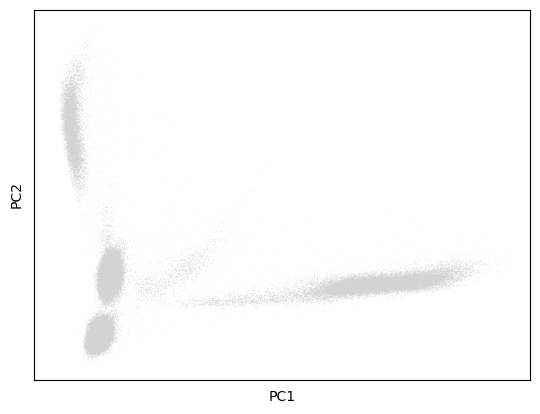

In [21]:
sc.pp.regress_out(adata, ['total_counts'])
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata)

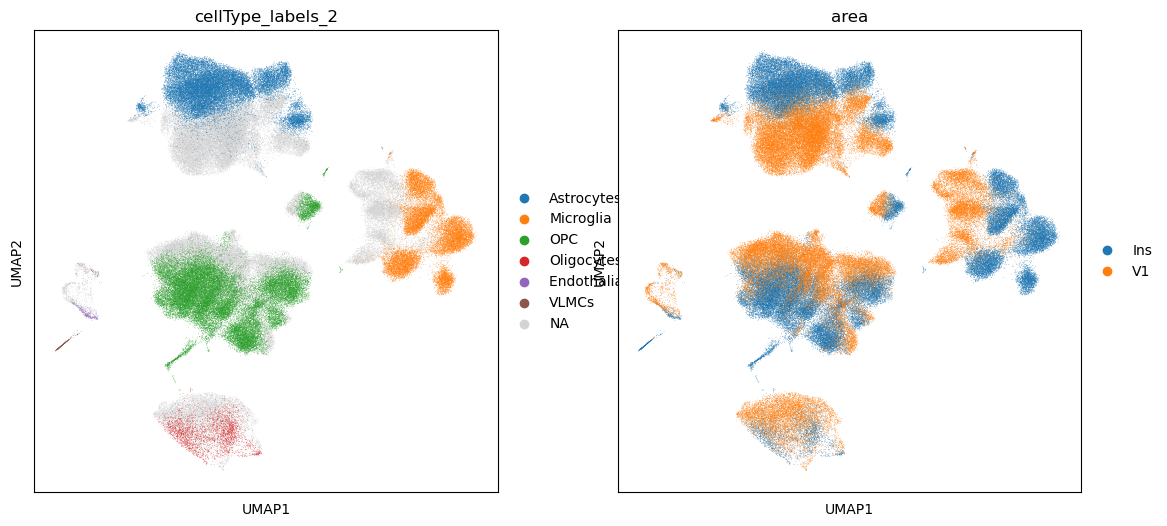

In [22]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
figsize(6,6)
sc.pl.umap(adata,color=['cellType_labels_2','area'])

### Integrate with harmoney

In [23]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%pylab inline
import sys
sys.path.append('./tools')
from two_species_heatmap import *
import harmonypy as hm

ho = hm.run_harmony(adata.obsm['X_pca'], adata.obs, ['batch','area'])
adata.obsm['X_harmonypca'] = ho.Z_corr.T
sc.pp.neighbors(adata, use_rep='X_harmonypca')

adata.obsm['X_umapraw'] = adata.obsm['X_umap']
sc.tl.umap(adata)
adata.obsm['X_umapharmony'] = adata.obsm['X_umap']

2025-02-28 16:44:59,174 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


2025-02-28 16:45:35,584 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-02-28 16:45:36,171 - harmonypy - INFO - Iteration 1 of 10
2025-02-28 16:47:12,627 - harmonypy - INFO - Iteration 2 of 10
2025-02-28 16:48:46,028 - harmonypy - INFO - Iteration 3 of 10
2025-02-28 16:50:32,930 - harmonypy - INFO - Converged after 3 iterations


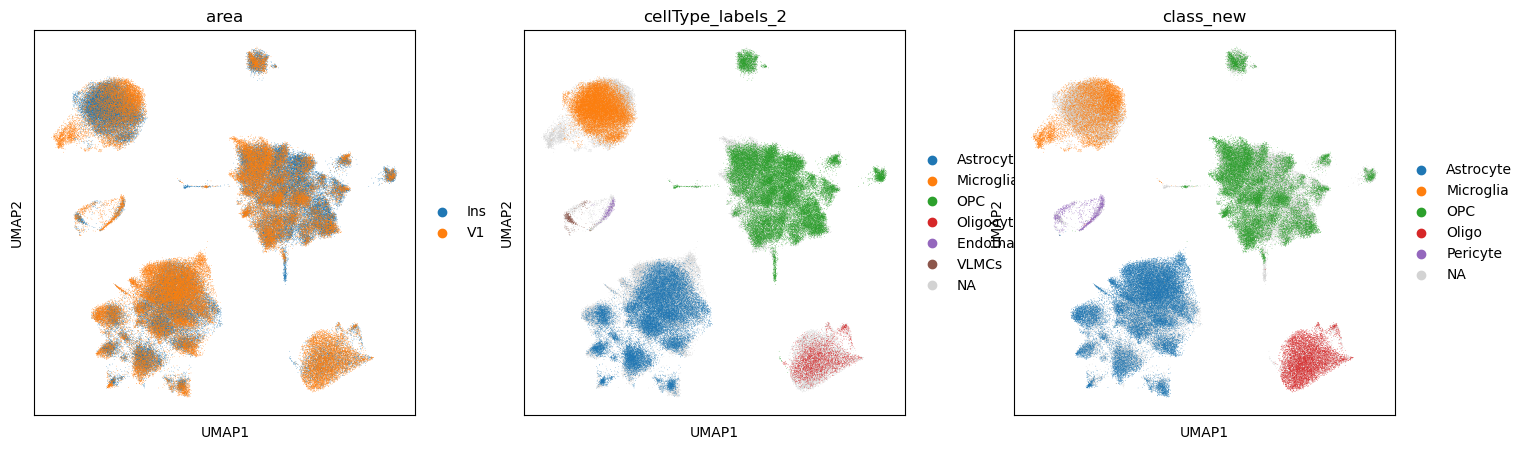

In [24]:
figsize(5,5)
sc.pl.umap(adata, color = ['area','cellType_labels_2','class_new'])

In [25]:
sc.pp.neighbors(adata,  metric='euclidean',use_rep = 'X_harmonypca' )
sc.tl.louvain(adata, resolution = 1.8, key_added = 'louvain')
adata.obs['louvain1_8'] = adata.obs['louvain']

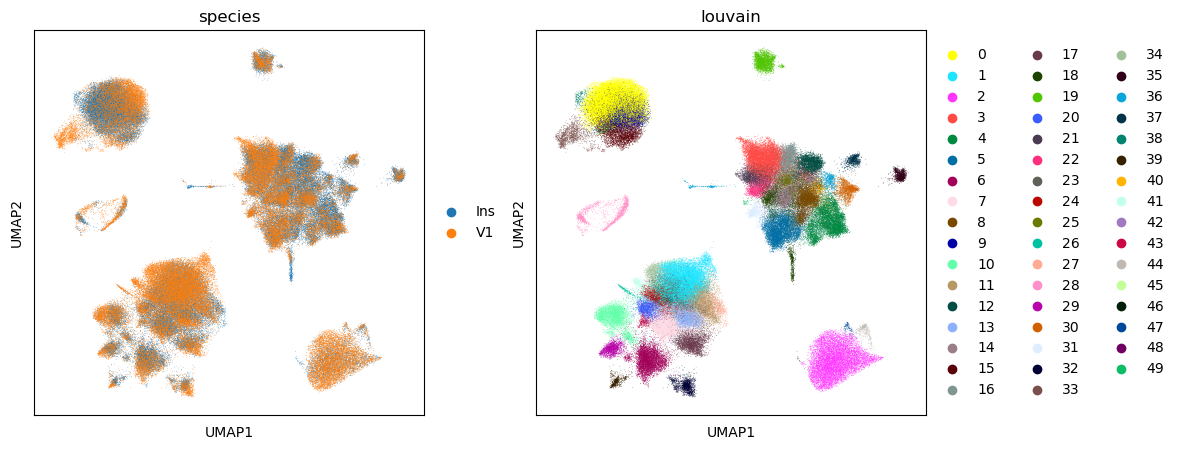

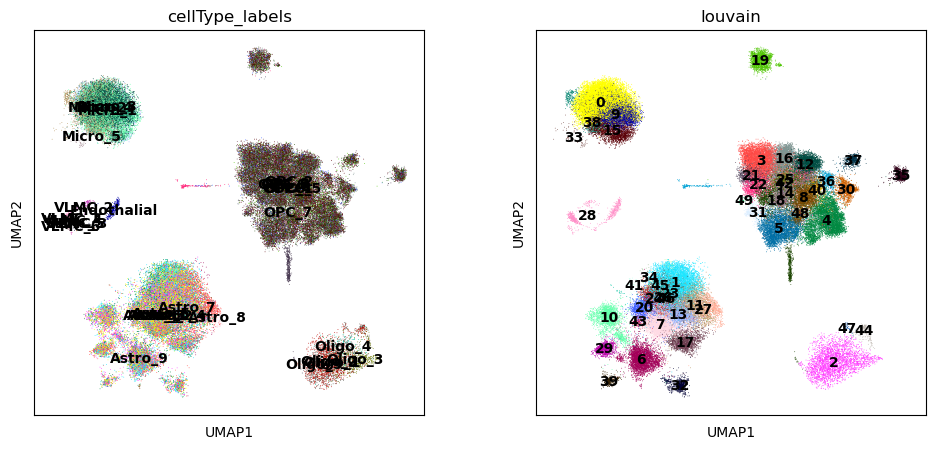

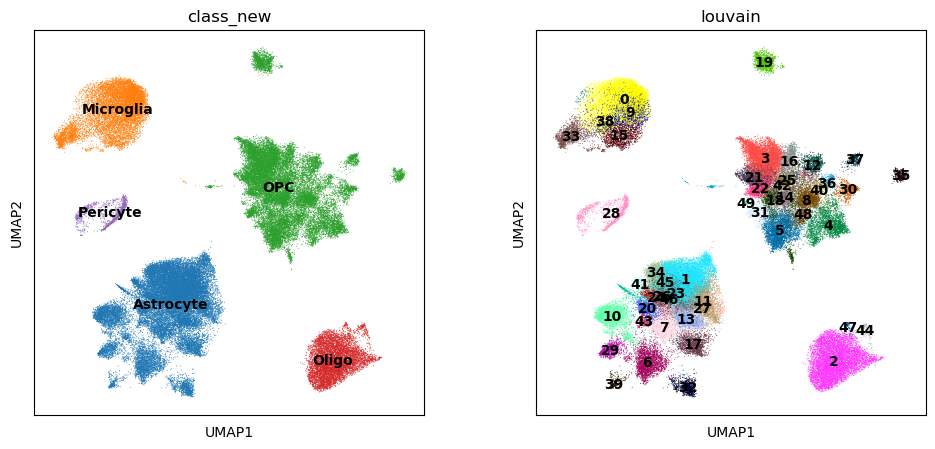

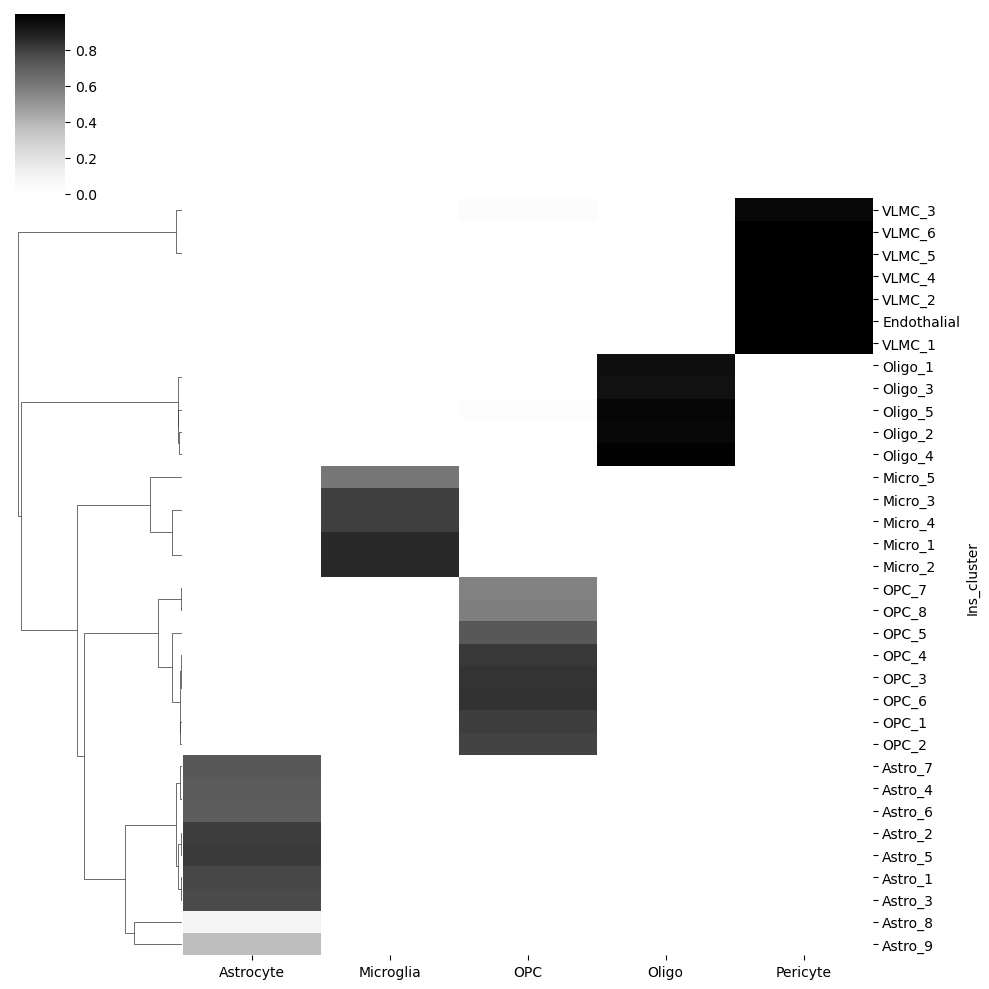

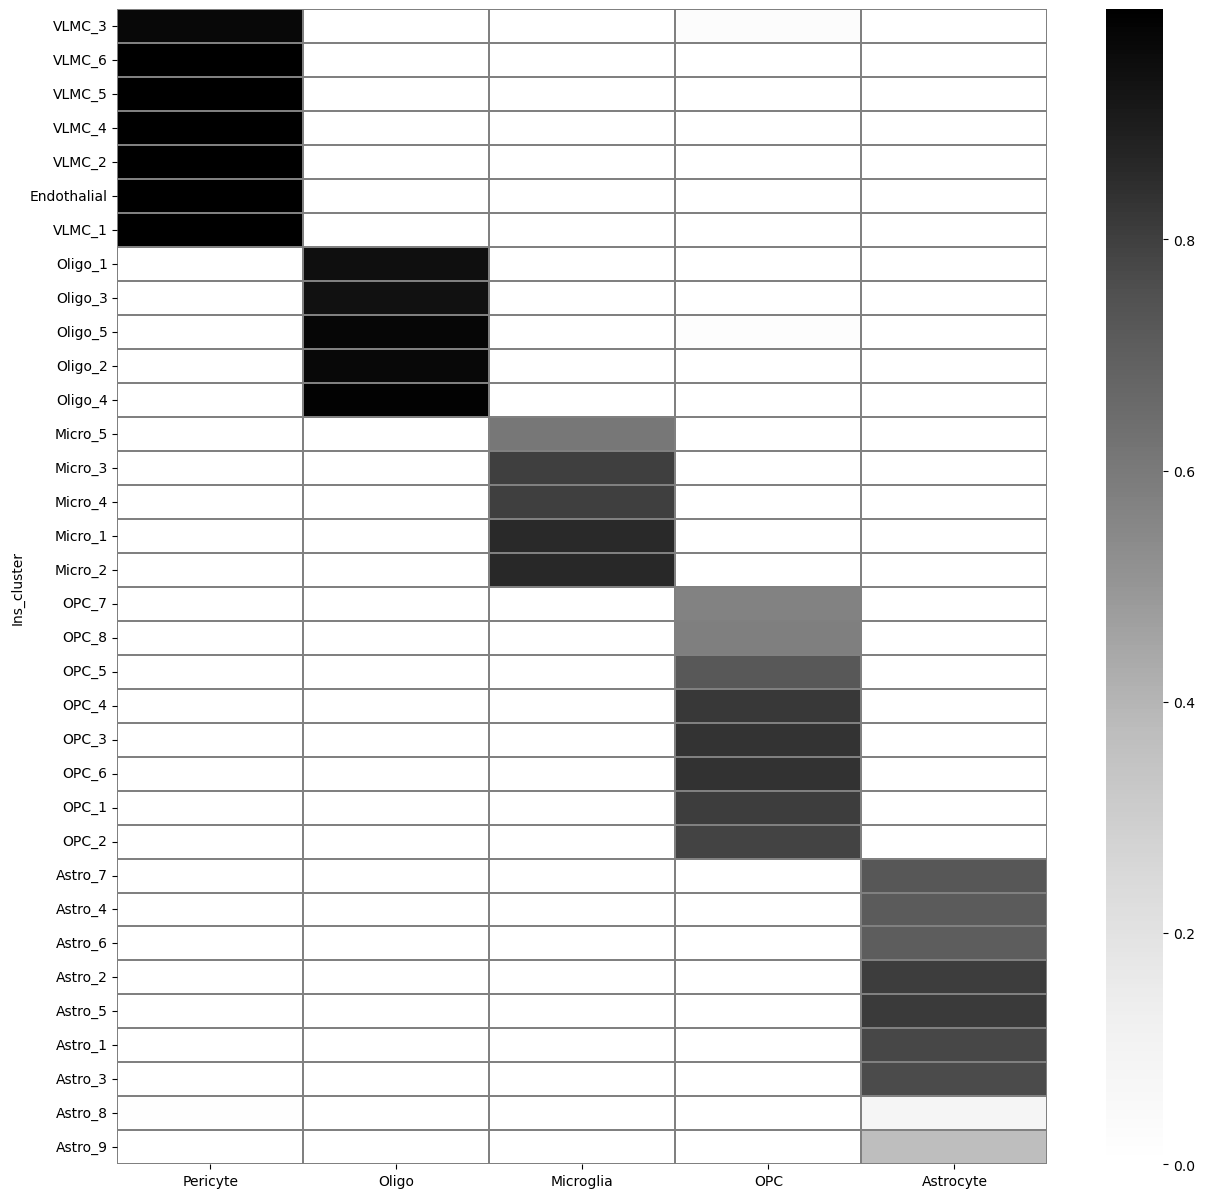

In [26]:
plot_GliaMatrix_ins_vs_v1_lovain_1_8 = two_species_heatmap(adata, species_1 = 'Ins', species_2 = 'V1',\
                species_1_key = 'cellType_labels', species_2_key = 'class_new',\
                louvain = 1.8)#,figure_path = 'neurons_heatmap_cmp.jpg')

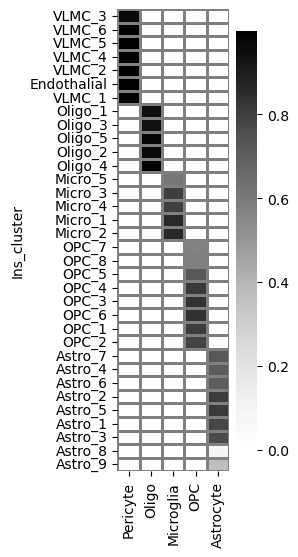

In [27]:
plt.figure(figsize = (1.8,6))
sns_plot = sns.heatmap(plot_GliaMatrix_ins_vs_v1_lovain_1_8, cmap='Greys', cbar=True, xticklabels=1,yticklabels=1, linewidth = 1, linecolor = 'gray')
plt.savefig('figs/Glia_cmpMatrix_Ins_vs_V1_500VirableGenes.pdf',dpi = 600, )

In [28]:
adata.write('./data_tem/tem_integratedGlia_ins_vs_v1_final.h5ad',compression='gzip')